In [33]:
import pandas as pd,matplotlib.pyplot as plt,seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_recall_fscore_support,confusion_matrix
from sklearn.preprocessing import StandardScaler


In [34]:
df=pd.read_csv('./heart_disease.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [35]:
x,y=df.drop(['target'],axis=1),df.target


In [36]:
s=StandardScaler()
X=s.fit_transform(x)
#len(X[0,]),len(x[0,])


In [37]:
model=LogisticRegression(max_iter=1000,solver='lbfgs')
xTrain,XTest,yTrain,yTest = train_test_split(X,y,test_size=0.2,random_state=42)
model.fit(xTrain,yTrain)


LogisticRegression(max_iter=1000)

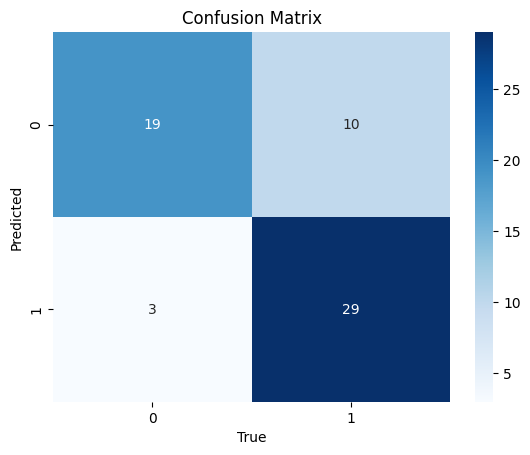

In [38]:
ypred=model.predict(XTest)
sns.heatmap(confusion_matrix(yTest, ypred,),cmap='Blues',annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.savefig('HeartConfusion.png')


In [39]:
accuracy_scor =accuracy_score(yTest,ypred)
accuracy_scor


0.7868852459016393

In [40]:
from sklearn.metrics import precision_score, recall_score


precision,recall,f1,_= precision_recall_fscore_support(yTest,ypred)
precision, recall, f1 = precision[1], recall[1], f1[1]
